<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/Module8_HousePriceExample_inClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import graphviz
import pydot
from io import StringIO

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.metrics as metrics

from sklearn.ensemble import RandomForestRegressor

from plotly.subplots import make_subplots
import plotly.graph_objects as go

from keras.models import Sequential
from keras.layers import Dense


# HOUSE PRICE EXAMPLE

# Get data

In [2]:
!git clone https://github.com/danielbauer1979/ML_656.git

Cloning into 'ML_656'...
remote: Enumerating objects: 322, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 322 (delta 116), reused 123 (delta 76), pack-reused 117
Receiving objects: 100% (322/322), 26.58 MiB | 18.93 MiB/s, done.
Resolving deltas: 100% (166/166), done.


In [3]:
house = pd.read_csv('ML_656/HouseData.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Prep Data

In [4]:
pd.set_option("display.max_rows", None)
house.isnull().sum(axis = 0)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
house = house.drop(columns=['Id','LotFrontage','Alley', 'BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature'])

In [6]:
house = house.dropna()
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotArea        1451 non-null   int64  
 3   Street         1451 non-null   object 
 4   LotShape       1451 non-null   object 
 5   LandContour    1451 non-null   object 
 6   Utilities      1451 non-null   object 
 7   LotConfig      1451 non-null   object 
 8   LandSlope      1451 non-null   object 
 9   Neighborhood   1451 non-null   object 
 10  Condition1     1451 non-null   object 
 11  Condition2     1451 non-null   object 
 12  BldgType       1451 non-null   object 
 13  HouseStyle     1451 non-null   object 
 14  OverallQual    1451 non-null   int64  
 15  OverallCond    1451 non-null   int64  
 16  YearBuilt      1451 non-null   int64  
 17  YearRemodAdd   1451 non-null   int64  
 18  RoofStyl

In [7]:
col_types = house.columns.to_series().groupby(house.dtypes).groups
numerics = list(house.select_dtypes(include=['int64']).columns)
factors = list(house.select_dtypes(include=['object']).columns)

In [8]:
house_numcols = house[numerics].drop(columns = ['SalePrice'])
house_faccols = house[factors]
dummies = pd.get_dummies(house_faccols, drop_first=True)
house_numcols_sc_0 = scale(house_numcols)
house_numcols_sc = pd.DataFrame(data=house_numcols_sc_0, columns = house_numcols.columns, index = dummies.index)
house_sc = pd.concat([house_numcols_sc, dummies], axis = 1)
house_sc = pd.concat([house_sc, house['SalePrice']], axis =1)
house_sc = house_sc.rename(columns={"SalePrice":"Y"})
house_sc.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Y
0,0.072441,-0.205996,0.656247,-0.520740,1.057250,0.883532,0.579345,-0.289621,-0.943764,-0.457576,...,0,0,0,1,0,0,0,1,0,208500
1,-0.872386,-0.090876,-0.067870,2.174601,0.162613,-0.424340,1.176868,-0.289621,-0.640635,0.469865,...,0,0,0,1,0,0,0,1,0,181500
2,0.072441,0.074297,0.656247,-0.520740,0.990980,0.835093,0.096054,-0.289621,-0.301312,-0.311378,...,0,0,0,1,0,0,0,1,0,223500
3,0.308648,-0.095881,0.656247,-0.520740,-1.858602,-0.714978,-0.497076,-0.289621,-0.061524,-0.686010,...,0,0,0,1,0,0,0,0,0,140000
4,0.072441,0.375612,1.380365,-0.520740,0.957846,0.738213,0.467309,-0.289621,-0.174632,0.202598,...,0,0,0,1,0,0,0,1,0,250000


## Explore

<ipython-input-9-92fc8dd032f8>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


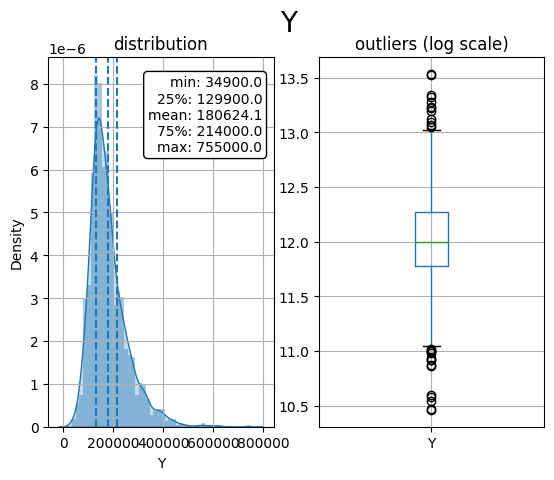

In [9]:
#From https://towardsdatascience.com/machine-learning-with-python-regression-complete-tutorial-47268e546cea
x = "Y"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = house_sc[x].fillna(house_sc[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable <
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = house_sc[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(house_sc[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [10]:
np.random.seed(42)
train, test = train_test_split(house_sc, test_size = 0.25)
X_train = train.drop(columns = ['Y']).values
y_train = train['Y'].values
X_test = test.drop(columns = ['Y']).values
y_test = test['Y'].values
X_train.shape

(1088, 195)

## Random Forest

In [11]:
house_rf = RandomForestRegressor(random_state=1)
house_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [12]:
house_rf_test_pred = house_rf.predict(X_test)

In [13]:
## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, house_rf_test_pred), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-house_rf_test_pred)/house_rf_test_pred)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, house_rf_test_pred)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, house_rf_test_pred))))

R2 (explained variance): 0.9
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.09
Mean Absolute Error (Σ|y-pred|/n): 15,485
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 22,399


## Deep Learning

In [16]:
model = Sequential()
model.add(Dense(50, input_shape=(195, ), activation='relu', name='dense_1'))
model.add(Dense(25, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
#https://keras.io/api/models/model_training_apis/
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                9800      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_output (Dense)        (None, 1)                 26        
                                                                 
Total params: 11101 (43.36 KB)
Trainable params: 11101 (43.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
history = model.fit(X_train, y_train, epochs=750, validation_split=0.25)

Epoch 1/750
26/26 [==============================] - 4s 36ms/step - loss: 39684988928.0000 - mae: 181681.0469 - val_loss: 39713652736.0000 - val_mae: 182001.2656
Epoch 2/750
26/26 [==============================] - 0s 10ms/step - loss: 39681806336.0000 - mae: 181672.7188 - val_loss: 39708389376.0000 - val_mae: 181987.9531
Epoch 3/750
26/26 [==============================] - 0s 11ms/step - loss: 39673421824.0000 - mae: 181651.4375 - val_loss: 39695740928.0000 - val_mae: 181956.3594
Epoch 4/750
26/26 [==============================] - 0s 7ms/step - loss: 39654981632.0000 - mae: 181605.5938 - val_loss: 39670403072.0000 - val_mae: 181893.3906
Epoch 5/750
26/26 [==============================] - 0s 11ms/step - loss: 39621509120.0000 - mae: 181521.6094 - val_loss: 39626522624.0000 - val_mae: 181785.1250
Epoch 6/750
26/26 [==============================] - 0s 8ms/step - loss: 39566643200.0000 - mae: 181385.1719 - val_loss: 39559438336.0000 - val_mae: 181618.7344
Epoch 7/750
26/26 [===========

In [18]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

In [21]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.25)

Epoch 1/100
26/26 [==============================] - 0s 11ms/step - loss: 700518016.0000 - mae: 16253.1836 - val_loss: 754047680.0000 - val_mae: 19215.1738
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 700189184.0000 - mae: 16263.4951 - val_loss: 754947456.0000 - val_mae: 19235.9707
Epoch 3/100
26/26 [==============================] - 0s 7ms/step - loss: 699735552.0000 - mae: 16255.5674 - val_loss: 754649152.0000 - val_mae: 19173.3359
Epoch 4/100
26/26 [==============================] - 0s 7ms/step - loss: 699756928.0000 - mae: 16243.1162 - val_loss: 754635840.0000 - val_mae: 19157.1875
Epoch 5/100
26/26 [==============================] - 0s 8ms/step - loss: 699655680.0000 - mae: 16265.5967 - val_loss: 754389056.0000 - val_mae: 19215.1406
Epoch 6/100
26/26 [==============================] - 0s 8ms/step - loss: 699653120.0000 - mae: 16250.6406 - val_loss: 754748928.0000 - val_mae: 19203.4707
Epoch 7/100
26/26 [==============================] - 0s 5ms/step - lo

In [22]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

In [23]:
house_nn_test_pred = model.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [24]:
## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, house_nn_test_pred), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-house_nn_test_pred)/house_nn_test_pred)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, house_nn_test_pred)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, house_nn_test_pred))))

R2 (explained variance): 0.87
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.51
Mean Absolute Error (Σ|y-pred|/n): 18,665
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 25,633
